Importing dependencies and loading the dataset.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset_path = "heart.csv"
df = pd.read_csv(dataset_path)

Exploring the dataset to see if there is any missing values or other things to consider.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [69]:
# Plotting head of dataset to see what it looks like
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data analysis.

In [70]:
# Checking statistical data of dataset
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [71]:
# Mappings
sex_mapping = {0: "female", 1: "male"}
df["sex"] = df["sex"].map(sex_mapping)

risk_mapping = {0: "low", 1: "high"}
df["output"] = df["output"].map(risk_mapping)


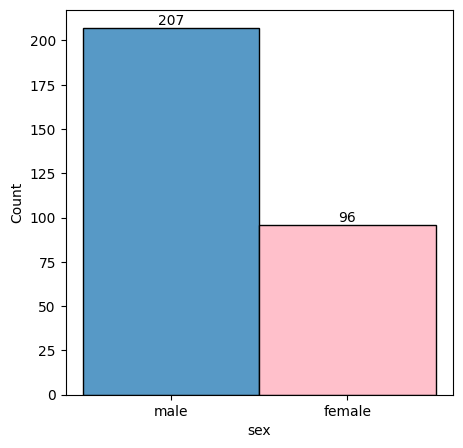

In [72]:
# Checking how many women and men are in the dataset.
plt.figure(figsize=(5, 5))
sns.histplot(data = df, x="sex", discrete=True)
plt.xticks([0, 1])
patches = plt.gca().patches
patches[1].set_fc('pink')

# Adding numbers to the bars
for patch in patches:
    height = patch.get_height()
    plt.annotate('{}'.format(height), xy=(patch.get_x() + patch.get_width() / 2, height),
                 xytext=(0, 0),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


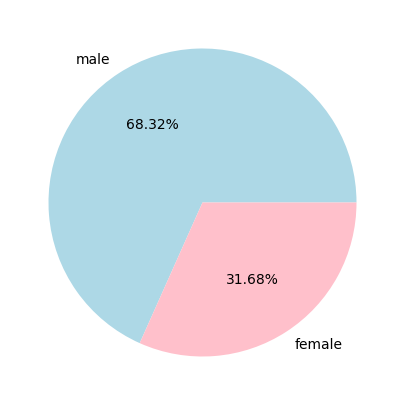

In [73]:
# Plotting gender percentages with pie chart
counts = df["sex"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct="%.2f%%", colors=["lightblue", "pink"])
#df.groupby("sex").size().plot(kind="pie", autopct="%.2f%%", colors=["pink", "lightblue"])
#plt.xlabel("Female = 0 and Male = 1")
plt.show()

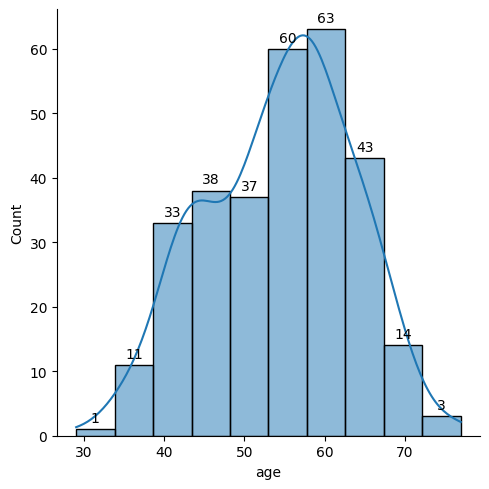

In [74]:
# Plotting age distribution
ax = sns.displot(df["age"], bins=10, kde=True,)

# Adding numbers to the bars
for patch in ax.ax.patches:
    height = patch.get_height()
    ax.ax.annotate('{}'.format(height), xy=(patch.get_x() + patch.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

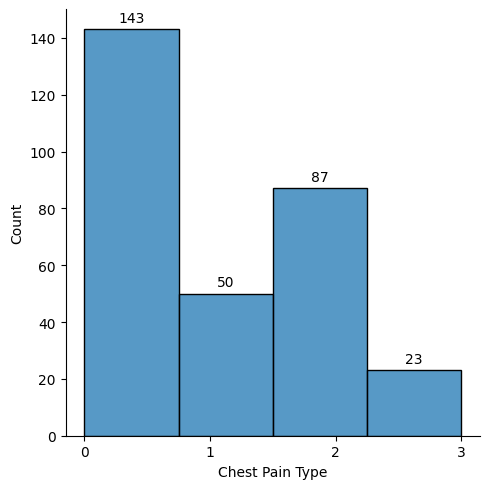

In [75]:
# Plotting chest pain type distribution. Note: Bars are not centered on the x-axis.
ax1 = sns.displot(df["cp"], kde=False, bins=4)
plt.xlabel("Chest Pain Type")
plt.xticks([0, 1, 2, 3])

# Adding numbers to the bars
for patch in ax1.ax.patches:
    height = patch.get_height()
    ax1.ax.annotate('{}'.format(height), xy=(patch.get_x() + patch.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')


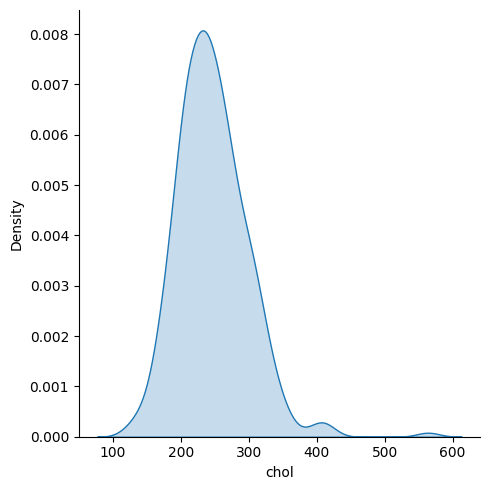

In [76]:
# Plotting cholesterol distribution
ax2 = sns.displot(df["chol"], kind="kde", fill=True)

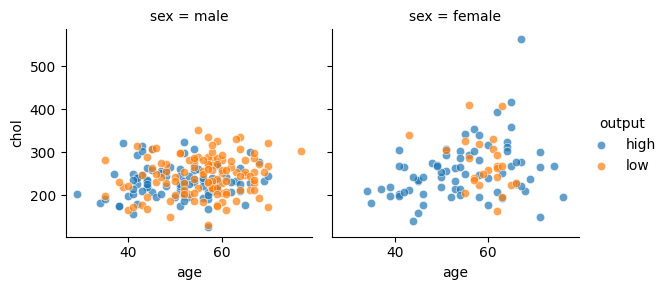

In [77]:
# Checking if there is any correlation between age and cholesterol with different sexes. Output 0 = Low heart attack chance and 1 = High heart attack chance.
g = sns.FacetGrid(df, col="sex", hue="output")
g.map(sns.scatterplot, "age", "chol", alpha=.7)
g.add_legend()

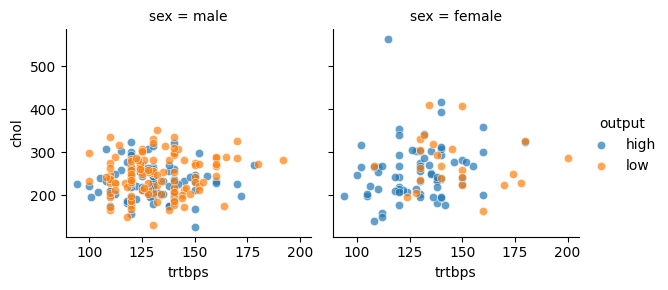

In [78]:
# Checking if there is any correlation between resting heart rate and cholesterol with different sexes. Output 0 = Low heart attack chance and 1 = High heart attack chance.
g1 = sns.FacetGrid(df, col="sex", hue="output")
g1.map(sns.scatterplot, "trtbps", "chol", alpha=.7)
g1.add_legend()

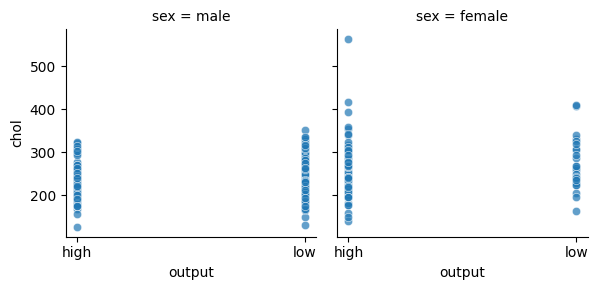

In [79]:
# Checking if there is large difference between sexes in terms of cholesterol and heart attack chance groups
g2 = sns.FacetGrid(df, col="sex")
g2.map(sns.scatterplot, "output", "chol", alpha=.7)
g2.add_legend()